In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# read file

def read_file(path):
    with open(path, "r") as f:
        return f.read()

# load data

def load_data():
    data_path = "./data/data.txt"
    all_data = read_file(data_path)

    all_lines = all_data.split('\n')

    # extract features and labels from eah line

    features = []
    labels = []
    for line in all_lines:
        if line[0:4] == 'spam':
            labels.append(1)
            features.append(line[5:])
            pass
        elif line[0:3] == 'ham':
            labels.append(0)
            features.append(line[4:])
            pass
        else:
            pass

    return features, labels

In [3]:
features, labels = load_data()
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# transform text into frequency 

vectorizer = TfidfVectorizer(input='content', lowercase=True, stop_words='english')
features_train_transformed = vectorizer.fit_transform(features_train)
features_test_transformed = vectorizer.transform(features_test)

# Exploration Begins

In [4]:
prediction = dict()

In [5]:
features_train = features_train_transformed
features_test = features_test_transformed

In [6]:
pred_scores = []
krnl = {'rbf' : 'rbf','polynominal' : 'poly', 'sigmoid': 'sigmoid'}
for k,v in krnl.items():
    for i in np.linspace(0.05, 1, num=20):
        svc = SVC(kernel=v, gamma=i)
        svc.fit(features_train, labels_train)
        pred = svc.predict(features_test)
        pred_scores.append((k, [i, accuracy_score(labels_test,pred)]))

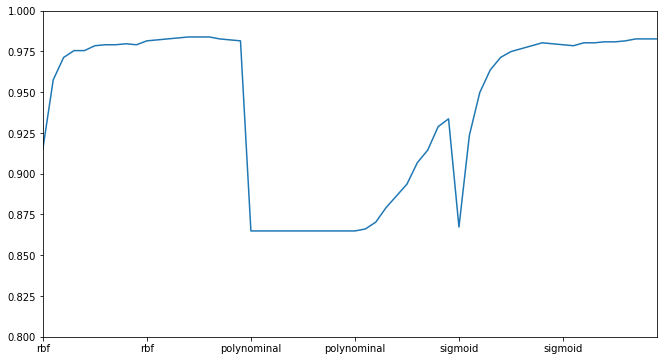

In [7]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Gamma','Score'])
df['Score'].plot(kind='line', figsize=(11,6), ylim=(0.8,1.0))

In [8]:
df[df['Score'] == df['Score'].max()]

,Gamma,Score
rbf,0.75,0.983861
rbf,0.80,0.983861
rbf,0.85,0.983861


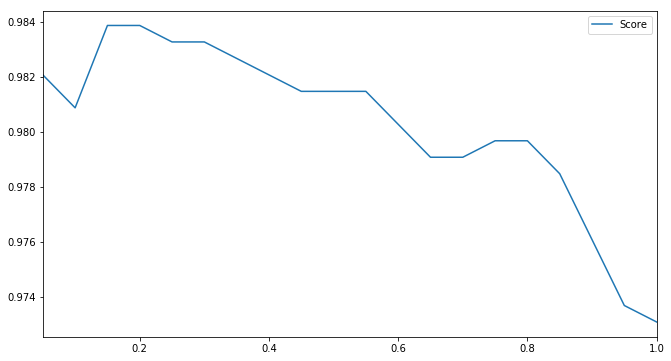

In [9]:
pred_scores = []
for i in np.linspace(0.05, 1, num=20):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(features_train, labels_train)
    pred = mnb.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [10]:
df[df['Score'] == df['Score'].max()]

,Score
0.15,0.983861
0.20,0.983861


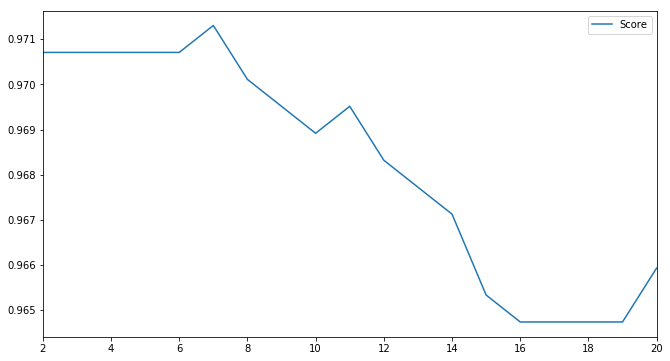

In [11]:
pred_scores = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=111)
    dtc.fit(features_train, labels_train)
    pred = dtc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [12]:
df[df['Score'] == df['Score'].max()]

,Score
7,0.971309


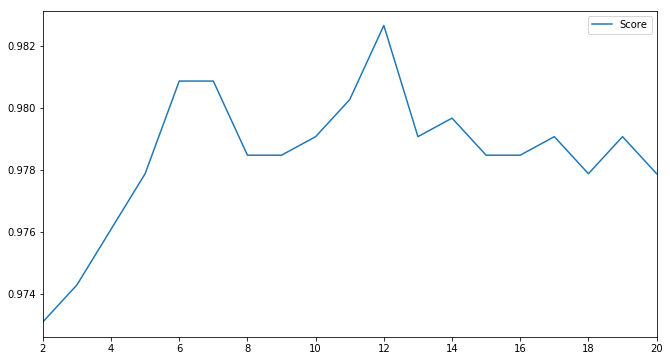

In [13]:
pred_scores = []
for i in range(2,21):
    dtc = RandomForestClassifier(min_samples_split=i, random_state=111)
    dtc.fit(features_train, labels_train)
    pred = dtc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

In [14]:
df[df['Score'] == df['Score'].max()]

,Score
12,0.982666
